# 匯入函式庫與讀取測站資料

In [13]:
import csv
import datetime
import urllib.parse
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

files = open("./station.csv", "r", encoding="utf-8-sig")
data = files.readlines()
files.close()

# 選取測站並爬取資料

In [15]:
print("請輸入測站站號或站名：")
station = input()
flag = 0

print("")
stationList = []
for i in data:
    list = i.strip().split(",")
    #print(list[0], list[1], station)
    
    if station in str(list[0]) or station in str(list[1]):
        stationList = [list[0], list[1], list[2], urllib.parse.quote(urllib.parse.quote(list[1]))]

if len(stationList) != 0:
    tonow = datetime.datetime.now()
    today = [int(tonow.year), int(tonow.month), int(tonow.day)]
    print("選取測站：" + stationList[1])

    output = [["日期", "溫度", "降水量"]]
    for i in range(today[0] - 11, today[0] + 1):
        print("----", i, "----")
        for j in range(1, 13):
            if i == today[0] and j == today[1]:
                break
            if i == today[0] - 11 and j < today[1]:
                continue
            url = "https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=" + stationList[0] + "&stname=" + stationList[3]+ "&datepicker=" + str(i) + "-" + str(j).zfill(2) + "&altitude=" + stationList[2] + "m#"
            page = requests.get(url)
            soup = BeautifulSoup(page.text,"html.parser")
            sel = soup.select("div.CSSTableGenerator td")
            for k in range(0, len(sel), 35):
                date = str(i) + "-" + str(j).zfill(2) + "-" + str(sel[k].text)
                print(date, sel[k + 7].text.rstrip(), sel[k + 21].text.rstrip())
                output.append([date, sel[k + 7].text.rstrip(), sel[k + 21].text.rstrip()])
                
else:
    print("無法讀取，請確認輸入是否有誤")


請輸入測站站號或站名：
宜蘭

選取測站：宜蘭
---- 2011 ----
2011-12-01 18.6 13.3
2011-12-02 16.6 0.3
2011-12-03 16.6 0.0
2011-12-04 18.0 0.0
2011-12-05 18.0 37.9
2011-12-06 20.4 63.1
2011-12-07 24.2 48.8
2011-12-08 19.5 0.0
2011-12-09 14.6 12.0
2011-12-10 15.0 10.5
2011-12-11 14.3 16.0
2011-12-12 17.2 19.9
2011-12-13 18.2 21.6
2011-12-14 19.0 45.5
2011-12-15 17.9 24.3
2011-12-16 15.3 2.2
2011-12-17 14.1 1.2
2011-12-18 16.0 T
2011-12-19 15.6 31.4
2011-12-20 17.5 8.0
2011-12-21 19.3 T
2011-12-22 15.5 11.4
2011-12-23 13.8 0.5
2011-12-24 12.6 0.0
2011-12-25 12.7 0.0
2011-12-26 13.5 12.1
2011-12-27 16.1 35.0
2011-12-28 18.4 0.0
2011-12-29 17.6 5.1
2011-12-30 15.4 8.0
2011-12-31 14.8 6.4
---- 2012 ----
2012-01-01 15.1 0.0
2012-01-02 14.4 0.1
2012-01-03 15.7 2.6
2012-01-04 11.8 0.6
2012-01-05 11.7 9.5
2012-01-06 15.7 18.5
2012-01-07 15.9 17.8
2012-01-08 18.2 8.5
2012-01-09 17.5 3.1
2012-01-10 16.8 T
2012-01-11 14.9 0.4
2012-01-12 14.8 15.1
2012-01-13 17.1 8.5
2012-01-14 20.1 2.0
2012-01-15 18.9 0.2
2012-01-16 18.

2013-02-01 19.7 0.0
2013-02-02 19.3 16.3
2013-02-03 21.7 0.2
2013-02-04 22.7 0.0
2013-02-05 22.1 0.0
2013-02-06 19.5 17.3
2013-02-07 19.7 29.7
2013-02-08 15.4 6.2
2013-02-09 16.4 0.0
2013-02-10 17.8 1.7
2013-02-11 18.8 0.7
2013-02-12 19.9 T
2013-02-13 16.3 T
2013-02-14 20.3 0.0
2013-02-15 18.7 T
2013-02-16 16.5 T
2013-02-17 19.5 0.0
2013-02-18 21.8 0.0
2013-02-19 19.0 0.0
2013-02-20 15.1 1.9
2013-02-21 18.2 22.6
2013-02-22 18.9 1.1
2013-02-23 16.1 14.5
2013-02-24 18.3 6.0
2013-02-25 20.8 0.0
2013-02-26 22.3 0.0
2013-02-27 20.3 5.6
2013-02-28 20.6 0.0
2013-03-01 21.1 6.2
2013-03-02 14.7 0.0
2013-03-03 13.5 0.0
2013-03-04 14.6 0.0
2013-03-05 16.6 0.0
2013-03-06 18.7 0.0
2013-03-07 19.7 0.0
2013-03-08 20.7 0.0
2013-03-09 21.5 0.0
2013-03-10 21.4 0.0
2013-03-11 19.0 0.0
2013-03-12 21.7 0.0
2013-03-13 22.2 0.7
2013-03-14 16.2 0.0
2013-03-15 18.0 0.7
2013-03-16 20.9 0.0
2013-03-17 22.6 0.0
2013-03-18 23.8 0.1
2013-03-19 23.9 0.3
2013-03-20 23.6 0.1
2013-03-21 18.5 3.5
2013-03-22 22.5 0.0
201

2014-04-01 21.4 0.0
2014-04-02 20.0 0.0
2014-04-03 20.6 0.0
2014-04-04 18.7 0.0
2014-04-05 19.6 0.0
2014-04-06 18.7 2.0
2014-04-07 19.0 3.4
2014-04-08 21.0 0.1
2014-04-09 22.0 0.0
2014-04-10 21.7 0.0
2014-04-11 22.0 0.0
2014-04-12 23.8 0.0
2014-04-13 23.8 0.8
2014-04-14 19.4 0.1
2014-04-15 20.6 0.0
2014-04-16 22.9 0.0
2014-04-17 24.2 0.0
2014-04-18 24.9 0.0
2014-04-19 24.6 0.0
2014-04-20 23.0 0.3
2014-04-21 21.4 T
2014-04-22 22.4 0.0
2014-04-23 19.9 0.5
2014-04-24 22.5 31.2
2014-04-25 23.4 9.2
2014-04-26 23.8 36.1
2014-04-27 24.6 0.0
2014-04-28 21.6 0.0
2014-04-29 20.5 0.0
2014-04-30 20.1 21.4
2014-05-01 20.4 12.9
2014-05-02 21.3 16.3
2014-05-03 19.9 19.0
2014-05-04 22.6 0.2
2014-05-05 19.7 19.3
2014-05-06 17.4 34.2
2014-05-07 20.9 7.9
2014-05-08 23.1 0.0
2014-05-09 22.9 5.1
2014-05-10 23.9 1.9
2014-05-11 25.2 0.0
2014-05-12 25.9 3.6
2014-05-13 26.2 0.0
2014-05-14 27.0 0.0
2014-05-15 26.1 5.7
2014-05-16 24.0 T
2014-05-17 25.8 0.0
2014-05-18 25.9 49.5
2014-05-19 25.0 6.4
2014-05-20 24.9

2015-06-01 26.5 0.5
2015-06-02 27.9 0.0
2015-06-03 28.3 0.0
2015-06-04 27.6 T
2015-06-05 27.5 2.3
2015-06-06 26.0 4.8
2015-06-07 26.5 1.0
2015-06-08 27.8 0.0
2015-06-09 28.3 0.0
2015-06-10 28.6 0.0
2015-06-11 28.8 0.0
2015-06-12 28.9 0.0
2015-06-13 28.7 T
2015-06-14 28.9 0.0
2015-06-15 29.1 0.0
2015-06-16 29.3 0.0
2015-06-17 29.5 0.0
2015-06-18 29.1 0.0
2015-06-19 29.4 0.0
2015-06-20 28.5 5.7
2015-06-21 28.1 32.8
2015-06-22 28.6 T
2015-06-23 28.5 0.5
2015-06-24 28.3 0.8
2015-06-25 29.1 0.0
2015-06-26 29.7 0.0
2015-06-27 29.4 21.6
2015-06-28 29.8 0.0
2015-06-29 29.4 0.0
2015-06-30 29.5 0.0
2015-07-01 29.7 0.0
2015-07-02 29.7 0.0
2015-07-03 29.3 0.7
2015-07-04 28.7 11.1
2015-07-05 29.1 1.2
2015-07-06 29.6 0.0
2015-07-07 30.0 0.0
2015-07-08 29.6 11.2
2015-07-09 28.9 3.3
2015-07-10 27.4 24.9
2015-07-11 30.1 0.0
2015-07-12 28.9 1.5
2015-07-13 29.0 0.0
2015-07-14 28.6 0.0
2015-07-15 27.2 0.2
2015-07-16 28.3 0.0
2015-07-17 28.4 0.0
2015-07-18 28.9 0.0
2015-07-19 28.3 55.6
2015-07-20 27.5 0.4


2016-08-01 29.7 3.9
2016-08-02 29.5 0.0
2016-08-03 29.1 0.0
2016-08-04 29.8 0.0
2016-08-05 29.8 0.0
2016-08-06 30.3 0.0
2016-08-07 29.1 11.5
2016-08-08 30.0 0.0
2016-08-09 30.1 0.0
2016-08-10 29.3 6.5
2016-08-11 28.7 24.0
2016-08-12 28.7 0.2
2016-08-13 27.5 10.0
2016-08-14 28.7 0.0
2016-08-15 29.2 0.0
2016-08-16 29.3 0.0
2016-08-17 28.9 0.0
2016-08-18 28.7 10.5
2016-08-19 27.5 78.5
2016-08-20 28.3 0.0
2016-08-21 29.0 0.0
2016-08-22 29.1 0.0
2016-08-23 29.7 0.0
2016-08-24 29.6 0.0
2016-08-25 29.8 0.0
2016-08-26 29.9 0.0
2016-08-27 28.5 5.9
2016-08-28 26.3 3.2
2016-08-29 26.6 0.0
2016-08-30 26.8 0.0
2016-08-31 27.2 0.0
2016-09-01 27.8 0.0
2016-09-02 28.1 0.7
2016-09-03 28.2 0.0
2016-09-04 28.6 45.9
2016-09-05 28.1 1.9
2016-09-06 28.1 0.2
2016-09-07 27.7 13.4
2016-09-08 27.1 14.8
2016-09-09 26.6 35.0
2016-09-10 26.3 78.1
2016-09-11 27.2 16.7
2016-09-12 27.8 0.0
2016-09-13 27.6 25.1
2016-09-14 27.1 81.3
2016-09-15 27.5 17.9
2016-09-16 28.0 18.7
2016-09-17 27.0 18.2
2016-09-18 27.7 0.1
2016

2017-10-01 29.1 0.0
2017-10-02 29.2 0.0
2017-10-03 29.1 0.0
2017-10-04 27.0 15.2
2017-10-05 28.0 4.4
2017-10-06 27.0 99.7
2017-10-07 26.8 33.5
2017-10-08 28.2 7.0
2017-10-09 28.1 27.0
2017-10-10 27.4 26.9
2017-10-11 26.7 80.3
2017-10-12 26.4 44.0
2017-10-13 26.1 125.5
2017-10-14 26.2 132.1
2017-10-15 25.7 57.3
2017-10-16 27.5 0.0
2017-10-17 27.2 0.5
2017-10-18 25.8 0.3
2017-10-19 24.9 0.4
2017-10-20 23.3 3.5
2017-10-21 22.9 0.2
2017-10-22 22.1 0.0
2017-10-23 21.8 0.0
2017-10-24 22.0 0.2
2017-10-25 22.3 0.0
2017-10-26 22.4 0.0
2017-10-27 23.2 T
2017-10-28 23.8 0.0
2017-10-29 22.8 0.2
2017-10-30 20.4 0.0
2017-10-31 20.3 3.6
2017-11-01 23.7 4.0
2017-11-02 25.2 0.0
2017-11-03 23.2 16.3
2017-11-04 19.4 13.1
2017-11-05 19.3 21.0
2017-11-06 23.7 4.5
2017-11-07 26.1 1.1
2017-11-08 24.1 8.0
2017-11-09 22.6 73.5
2017-11-10 25.1 0.6
2017-11-11 22.0 24.5
2017-11-12 21.2 15.6
2017-11-13 22.7 25.6
2017-11-14 22.6 18.0
2017-11-15 22.2 3.7
2017-11-16 23.8 1.6
2017-11-17 24.9 0.0
2017-11-18 21.2 13.4
2

2018-12-01 21.7 0.0
2018-12-02 22.4 0.0
2018-12-03 22.3 0.0
2018-12-04 23.4 0.0
2018-12-05 21.1 6.9
2018-12-06 23.2 1.7
2018-12-07 19.4 3.0
2018-12-08 18.0 40.5
2018-12-09 18.3 13.3
2018-12-10 20.7 2.5
2018-12-11 21.6 0.0
2018-12-12 17.5 0.0
2018-12-13 17.0 14.0
2018-12-14 17.4 43.5
2018-12-15 18.1 45.5
2018-12-16 20.5 0.0
2018-12-17 16.5 0.0
2018-12-18 16.0 0.0
2018-12-19 18.1 0.0
2018-12-20 20.1 0.0
2018-12-21 21.4 0.0
2018-12-22 22.9 0.0
2018-12-23 20.2 19.5
2018-12-24 17.4 7.2
2018-12-25 20.9 3.7
2018-12-26 22.5 T
2018-12-27 18.5 4.5
2018-12-28 15.4 2.5
2018-12-29 13.7 3.1
2018-12-30 14.9 56.5
2018-12-31 16.3 38.8
---- 2019 ----
2019-01-01 16.2 111.5
2019-01-02 16.7 149.5
2019-01-03 18.3 62.8
2019-01-04 21.4 6.7
2019-01-05 21.4 0.0
2019-01-06 19.0 19.1
2019-01-07 19.4 7.5
2019-01-08 19.3 1.7
2019-01-09 18.1 46.6
2019-01-10 22.0 0.6
2019-01-11 22.9 2.0
2019-01-12 20.7 T
2019-01-13 18.8 0.5
2019-01-14 18.6 2.7
2019-01-15 21.3 1.6
2019-01-16 17.2 13.5
2019-01-17 16.6 0.8
2019-01-18 17

2020-02-01 13.7 0.0
2020-02-02 16.4 0.0
2020-02-03 17.9 1.8
2020-02-04 18.3 1.0
2020-02-05 16.2 5.9
2020-02-06 17.3 2.5
2020-02-07 18.8 0.0
2020-02-08 16.5 0.0
2020-02-09 15.2 0.0
2020-02-10 16.2 0.0
2020-02-11 18.7 0.0
2020-02-12 21.5 T
2020-02-13 22.0 0.0
2020-02-14 23.1 0.0
2020-02-15 22.7 0.0
2020-02-16 16.2 1.1
2020-02-17 11.7 0.0
2020-02-18 12.8 0.0
2020-02-19 16.3 0.0
2020-02-20 17.5 1.6
2020-02-21 20.1 0.0
2020-02-22 19.2 5.5
2020-02-23 17.8 7.2
2020-02-24 20.7 4.2
2020-02-25 22.1 0.0
2020-02-26 22.9 0.0
2020-02-27 19.4 6.2
2020-02-28 20.8 3.0
2020-02-29 22.4 0.0
2020-03-01 21.6 0.0
2020-03-02 17.9 T
2020-03-03 19.8 T
2020-03-04 19.4 0.0
2020-03-05 15.1 14.1
2020-03-06 18.4 0.5
2020-03-07 21.7 0.0
2020-03-08 21.5 9.0
2020-03-09 23.2 0.0
2020-03-10 18.6 12.6
2020-03-11 16.6 0.0
2020-03-12 19.9 0.0
2020-03-13 22.1 1.6
2020-03-14 16.9 1.9
2020-03-15 16.8 0.0
2020-03-16 18.2 0.0
2020-03-17 20.6 0.0
2020-03-18 20.9 0.1
2020-03-19 21.1 4.0
2020-03-20 20.9 0.0
2020-03-21 23.5 0.0
2020

2021-04-01 24.8 0.0
2021-04-02 24.9 0.0
2021-04-03 24.6 0.0
2021-04-04 19.8 1.5
2021-04-05 17.4 0.0
2021-04-06 18.4 0.0
2021-04-07 19.3 0.0
2021-04-08 20.7 1.0
2021-04-09 18.0 0.0
2021-04-10 20.0 0.0
2021-04-11 23.0 T
2021-04-12 24.0 0.0
2021-04-13 23.4 1.5
2021-04-14 20.8 4.5
2021-04-15 21.8 T
2021-04-16 22.2 0.0
2021-04-17 22.1 T
2021-04-18 19.5 0.0
2021-04-19 20.2 0.0
2021-04-20 21.7 0.0
2021-04-21 22.6 8.5
2021-04-22 23.7 16.5
2021-04-23 24.3 2.0
2021-04-24 23.0 1.0
2021-04-25 21.1 6.5
2021-04-26 21.9 0.5
2021-04-27 22.1 0.5
2021-04-28 21.9 15.5
2021-04-29 19.3 12.5
2021-04-30 22.2 0.0
2021-05-01 23.6 0.0
2021-05-02 24.2 0.0
2021-05-03 24.2 0.5
2021-05-04 25.8 0.5
2021-05-05 22.6 T
2021-05-06 23.7 T
2021-05-07 25.9 0.0
2021-05-08 25.8 3.0
2021-05-09 26.4 0.0
2021-05-10 27.0 0.0
2021-05-11 27.1 0.0
2021-05-12 27.2 17.5
2021-05-13 28.0 T
2021-05-14 27.9 0.0
2021-05-15 28.2 0.0
2021-05-16 28.7 0.0
2021-05-17 28.1 0.0
2021-05-18 28.0 T
2021-05-19 27.7 1.0
2021-05-20 28.1 0.0
2021-05-21

2022-06-01 27.3 T
2022-06-02 26.4 55.0
2022-06-03 26.7 3.5
2022-06-04 27.0 4.0
2022-06-05 27.6 0.0
2022-06-06 27.0 10.0
2022-06-07 24.1 18.5
2022-06-08 22.5 13.0
2022-06-09 24.8 2.5
2022-06-10 25.8 T
2022-06-11 25.4 12.0
2022-06-12 24.9 13.5
2022-06-13 27.4 0.0
2022-06-14 28.2 0.0
2022-06-15 26.2 1.5
2022-06-16 26.1 9.0
2022-06-17 26.6 0.0
2022-06-18 27.9 0.0
2022-06-19 27.5 5.0
2022-06-20 28.2 0.0
2022-06-21 27.6 3.5
2022-06-22 28.5 0.0
2022-06-23 28.7 0.0
2022-06-24 28.2 T
2022-06-25 28.1 0.5
2022-06-26 28.7 0.0
2022-06-27 29.2 0.0
2022-06-28 29.4 0.0
2022-06-29 29.5 0.0
2022-06-30 29.1 0.0
2022-07-01 28.1 T
2022-07-02 27.2 7.5
2022-07-03 27.8 1.0
2022-07-04 28.4 0.0
2022-07-05 28.8 0.0
2022-07-06 29.6 T
2022-07-07 29.6 0.0
2022-07-08 29.5 0.0
2022-07-09 29.7 0.0
2022-07-10 29.5 0.0
2022-07-11 29.7 0.0
2022-07-12 29.3 0.0
2022-07-13 29.3 0.0
2022-07-14 29.6 0.0
2022-07-15 29.5 0.0
2022-07-16 30.0 0.0
2022-07-17 30.0 0.0
2022-07-18 29.6 0.0
2022-07-19 30.2 0.0
2022-07-20 30.1 T
2022-0

# 產製氣候圖

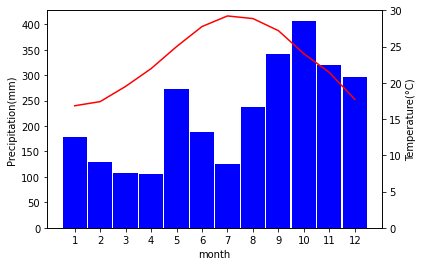

In [16]:
dayNumberT = [0] * 12
dayNumberP = [0] * 12
daySumT = [0.0] * 12
daySumP = [0.0] * 12
dayArray = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

for line in output:
    mydate = line[0].strip().split("-")
    
    if "." in line[1] and "..." not in line[1]:
        daySumT[int(mydate[1])-1] += float(line[1])
        dayNumberT[int(mydate[1])-1] += 1
        
    if "." in line[2] and "..." not in line[2]:
        daySumP[int(mydate[1])-1] += float(line[2])
        dayNumberP[int(mydate[1])-1] += 1
        
    if "T" in line[2] or "&" in line[2] :
        dayNumberP[int(mydate[1])-1] += 1
        
for i in range(0, len(daySumT)):
    if dayNumberT[i] != 0:
        daySumT[i] /= dayNumberT[i]
    daySumP[i] = daySumP[i] / dayNumberP[i] * dayArray[i]

    
#出圖
fig, ax1 = plt.subplots()
plt.xlabel('month')
ax2 = ax1.twinx()

ax1.set_ylabel('Precipitation(mm)', color='black')
ax1.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], 
        daySumP,
        width=0.95, 
        bottom=None,
        color='blue',
        align='center')
ax1.tick_params(axis='y', labelcolor='black')

ax2.set_ylabel('Temperature(°C)', color='black')
plt.ylim((0, (float(daySumT[6])+0.3)//5 * 5 + 5))
ax2.tick_params(axis='y', labelcolor='black')
if not (stationList[0][0] == "C" and stationList[0][1] == "1"):
    ax2.plot(daySumT, color='red')
    

plt.show()

# 輸出csv

In [17]:
with open("./create_data/" + stationList[1] + "氣候資料" + '.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(output)
    
with open("./create_data/" + stationList[1] + "逐月平均氣候資料" + '.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["月份", "溫度", "降水量"])
    for i in range(1, 13):
        writer.writerow([i, daySumT[i-1], daySumP[i-1]])